# Dataset Basic

# New Section

In [1]:
import warnings
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.linear_model import BayesianRidge
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.feature_selection import SelectKBest
from sklearn.linear_model import LassoLars
from sklearn.linear_model import  ElasticNet
from sklearn.linear_model import RidgeCV
from sklearn.linear_model import  MultiTaskElasticNet
from sklearn.svm import SVC
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import OrthogonalMatchingPursuit
from sklearn.linear_model import MultiTaskElasticNetCV
from sklearn.linear_model import SGDRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error,r2_score
warnings.filterwarnings('ignore')

In [ ]:
data_set = pd.read_csv("dataset v7_57k another pattern.csv")
data_set.head(5)

,Unknown,Restaurant,Restaurant Type,Area,District,Start Day,Start Month,Start Year,base on District-# of ppl able to work>15 - 19,base on District-# of ppl able to work>20 - 24,base on District-# of ppl able to work>25 - 29,base on District-# of ppl able to work>30 - 34,base on District-# of ppl able to work>35 - 39,base on District-# of ppl able to work>40 - 44,base on District-# of ppl able to work>45 - 49,base on District-# of ppl able to work>50 - 54,base on District-# of ppl able to work>55 - 59,base on District-# of ppl able to work>60 - 64,base on District-# of ppl able to work>65+,base on Area #of worker location>15 - 19,base on Area #of worker location>20 - 24,base on Area #of worker location>25 - 29,base on Area #of worker location>30 - 34,base on Area #of worker location>35 - 39,base on Area #of worker location>40 - 44,base on Area #of worker location>45 - 49,base on Area #of worker location>50 - 54,base on Area #of worker location>55 - 59,base on Area #of worker location>60 - 64,base on Area #of worker location>65+,total Sales,payment type-cash,payment type-visa/master,payment type-others,#of transaction,Restaurant Status,sqf,mthly rent,Restaurant Type.1,Location Type,Unnamed: 40
0,0,1,1,2,8,7,4,2018,2739,14357,25571,28335,26243,24622,24061,27139,22843,13328,7986,10656,59251,93201,103923,97648,97804,96617,104372,84884,45005,24839,2726286.405,1792628.231,304562.1822,629095.9921,77768.75302,1,2530.0,19140.0,1,2,NaN
1,1,2,1,2,8,2,4,2018,2739,14357,25571,28335,26243,24622,24061,27139,22843,13328,7986,10656,59251,93201,103923,97648,97804,96617,104372,84884,45005,24839,2965186.851,2061957.993,283563.0118,619665.8462,56287.80426,1,2483.0,19308.0,1,2,NaN
2,65,66,1,2,8,19,10,2018,2739,14357,25571,28335,26243,24622,24061,27139,22843,13328,7986,10656,59251,93201,103923,97648,97804,96617,104372,84884,45005,24839,5319932.242,4051555.908,764556.0793,503820.2542,136928.31050,1,3683.0,150333.0,1,2,NaN
3,73,74,1,2,8,28,11,2018,2739,14357,25571,28335,26243,24622,24061,27139,22843,13328,7986,10656,59251,93201,103923,97648,97804,96617,104372,84884,45005,24839,5310451.505,4037878.628,766905.4799,505667.3968,139361.79860,1,550.0,71342.0,1,1,NaN
4,80,81,1,2,8,1,1,2018,2739,14357,25571,28335,26243,24622,24061,27139,22843,13328,7986,10656,59251,93201,103923,97648,97804,96617,104372,84884,45005,24839,7192148.358,5869142.402,803167.6307,519838.3255,140791.08340,1,3247.0,154058.0,1,1,NaN


In [ ]:
data_set['Restaurant Type'].unique()

array([1, 5, 3, 2, 4, 6])

In [ ]:
data_set.columns

Index(['Unknown', 'Restaurant', 'Restaurant Type', 'Area', 'District',
       'Start Day', 'Start Month', 'Start Year',
       'base on District-# of ppl able to work>15 - 19',
       'base on District-# of ppl able to work>20 - 24',
       'base on District-# of ppl able to work>25 - 29',
       'base on District-# of ppl able to work>30 - 34',
       'base on District-# of ppl able to work>35 - 39',
       'base on District-# of ppl able to work>40 - 44',
       'base on District-# of ppl able to work>45 - 49',
       'base on District-# of ppl able to work>50 - 54',
       'base on District-# of ppl able to work>55 - 59',
       'base on District-# of ppl able to work>60 - 64',
       'base on District-# of ppl able to work>65+',
       'base on Area #of worker location>15 - 19',
       'base on Area #of worker location>20 - 24',
       'base on Area #of worker location>25 - 29',
       'base on Area #of worker location>30 - 34',
       'base on Area #of worker location>35 - 39',
  

In [ ]:
i = 0
print("Columns\t|Null Values")
while i< len(data_set.columns):
    print(data_set.columns.values[i],"|",data_set.iloc[:, i].isnull().sum(axis = 0))
    i = i+1

Columns	|Null Values
Unknown | 0
Restaurant | 0
Restaurant Type | 0
Area | 0
District | 0
Start Day | 0
Start Month | 0
Start Year | 0
base on District-# of ppl able to work>15 - 19 | 0
base on District-# of ppl able to work>20 - 24 | 0
base on District-# of ppl able to work>25 - 29 | 0
base on District-# of ppl able to work>30 - 34 | 0
base on District-# of ppl able to work>35 - 39 | 0
base on District-# of ppl able to work>40 - 44 | 0
base on District-# of ppl able to work>45 - 49 | 0
base on District-# of ppl able to work>50 - 54 | 0
base on District-# of ppl able to work>55 - 59 | 0
base on District-# of ppl able to work>60 - 64 | 0
base on District-# of ppl able to work>65+ | 0
base on Area #of worker location>15 - 19 | 0
base on Area #of worker location>20 - 24 | 0
base on Area #of worker location>25 - 29 | 0
base on Area #of worker location>30 - 34 | 0
base on Area #of worker location>35 - 39 | 0
base on Area #of worker location>40 - 44 | 0
base on Area #of worker location>45 - 

In [ ]:
data_set = data_set.fillna(0)

In [ ]:
data_set['Restaurant Status'].unique()

array([1, 0])

# Overall status

Text(0.5, 1.0, 'Count of Restaurant Status')

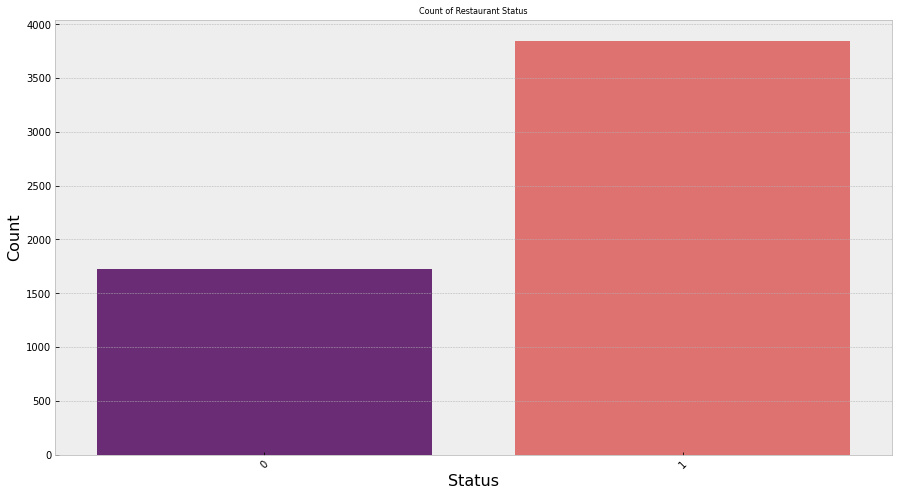

In [ ]:
l = data_set['Restaurant Status'].value_counts()
n = pd.DataFrame(data_set['Restaurant Status'].value_counts()).index.values
plt.style.use('bmh')
plt.figure(figsize=(15,8))
sns.barplot(n, l, palette='magma')
plt.xticks(rotation=45)
plt.xlabel('Status',fontsize=16)
plt.ylabel('Count',fontsize=16)
plt.title("Count of Restaurant Status",fontsize=8)

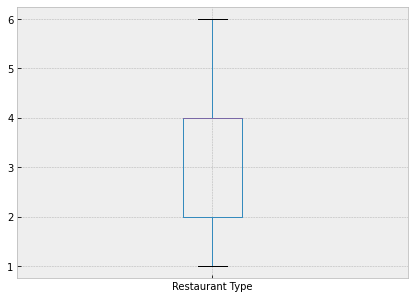

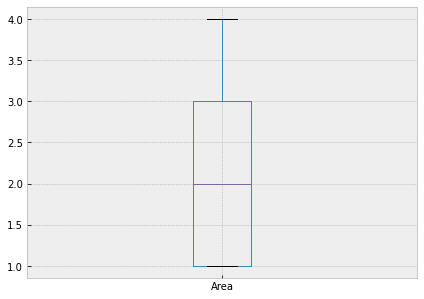

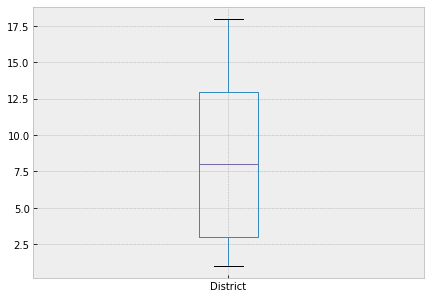

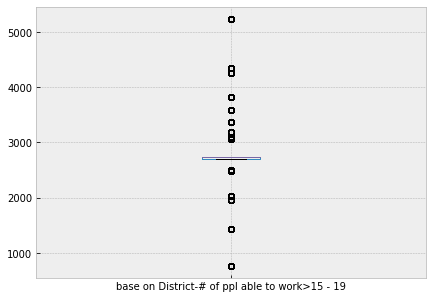

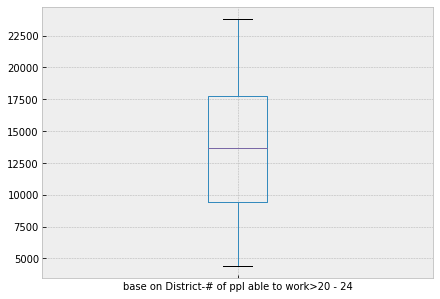

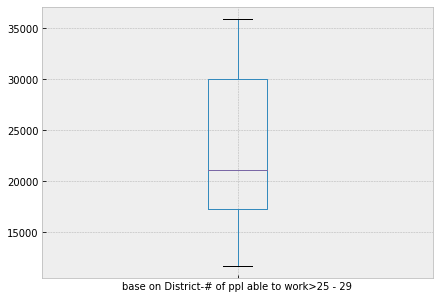

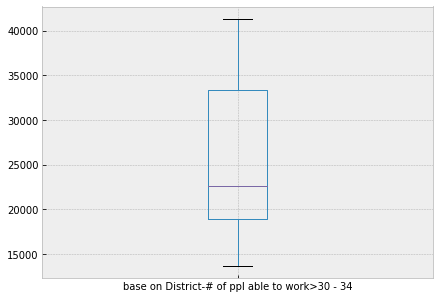

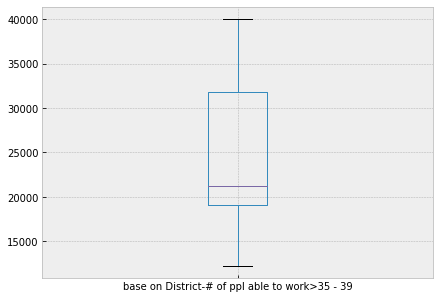

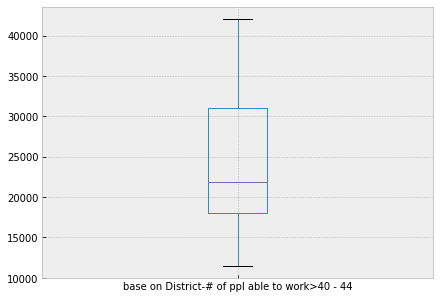

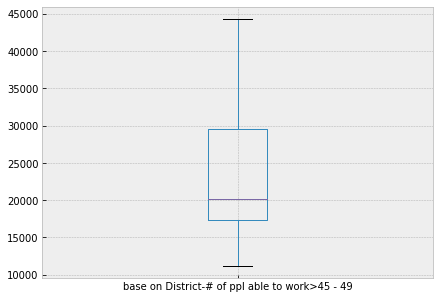

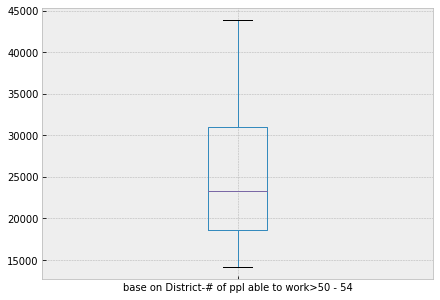

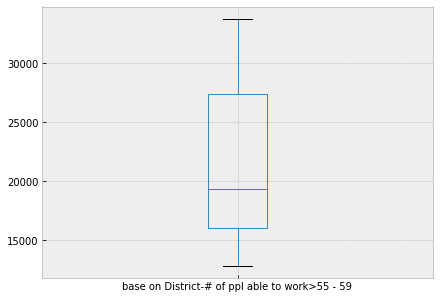

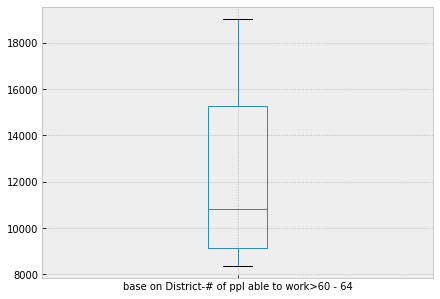

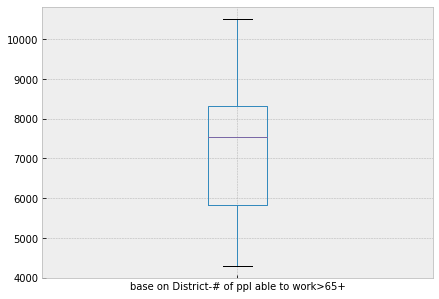

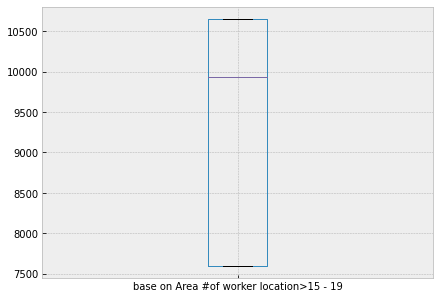

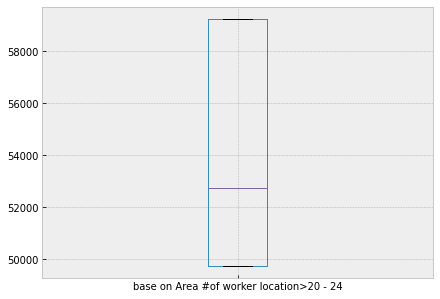

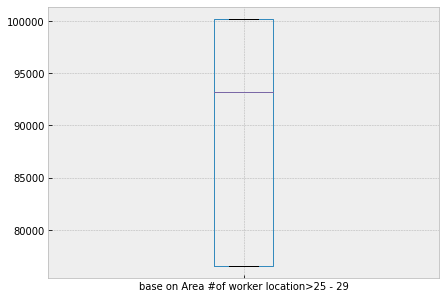

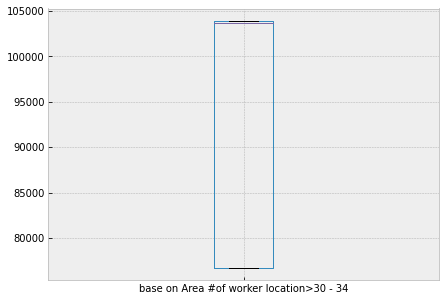

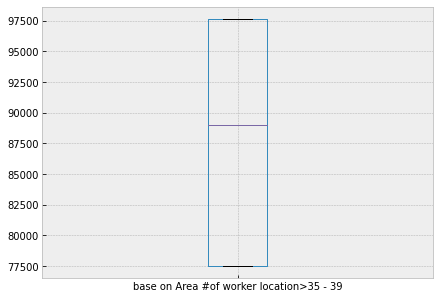

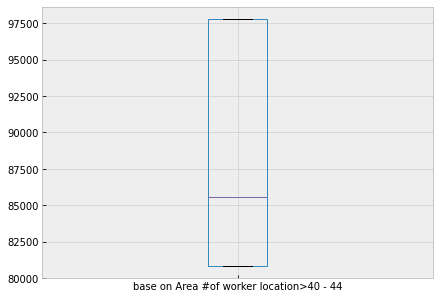

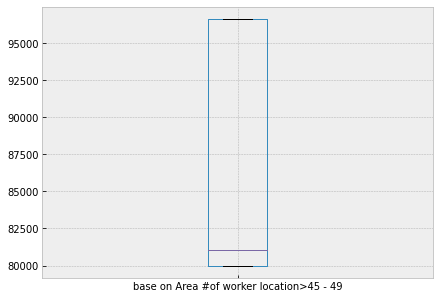

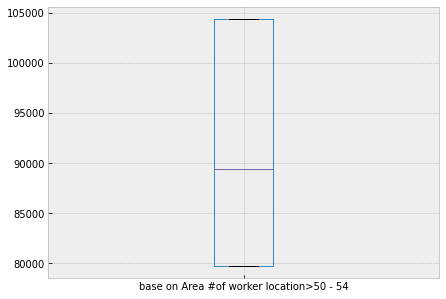

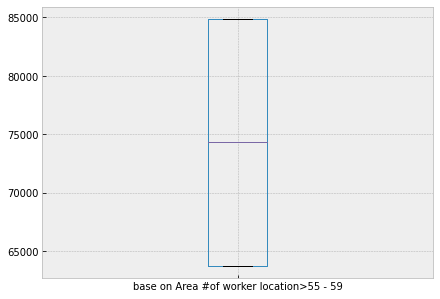

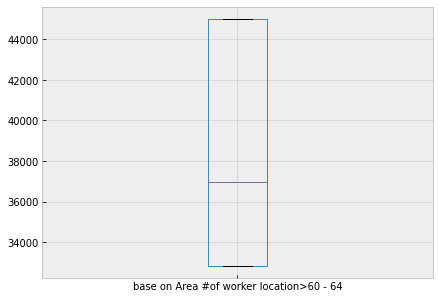

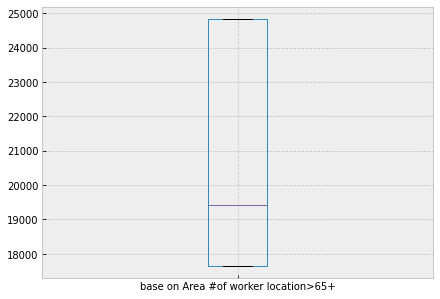

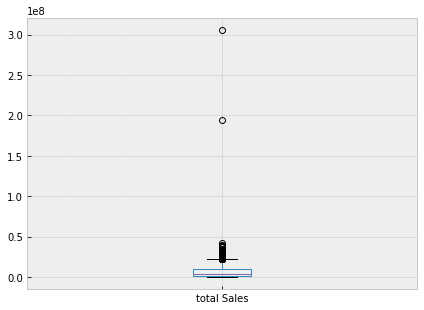

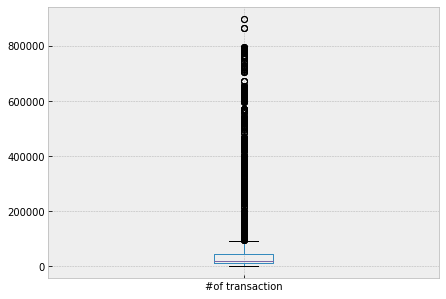

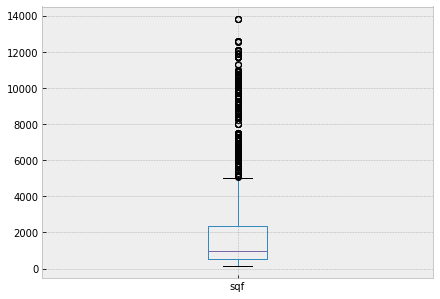

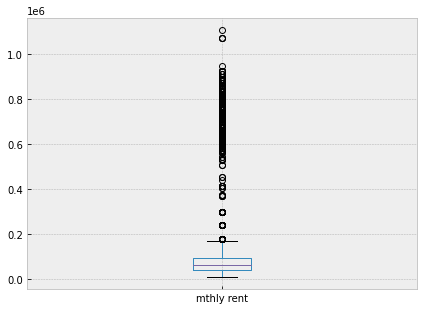

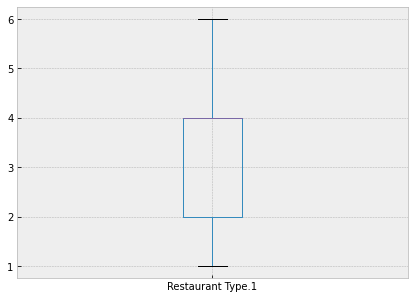

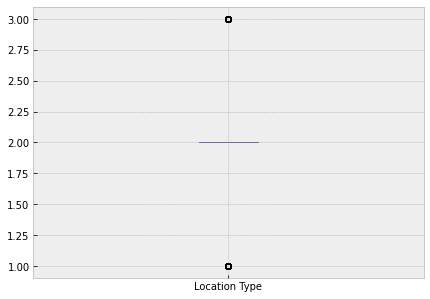

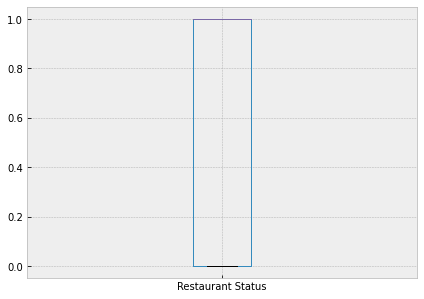

In [ ]:
box_df = data_set[['Restaurant Type', 'Area', 'District',
       'base on District-# of ppl able to work>15 - 19',
       'base on District-# of ppl able to work>20 - 24',
       'base on District-# of ppl able to work>25 - 29',
       'base on District-# of ppl able to work>30 - 34',
       'base on District-# of ppl able to work>35 - 39',
       'base on District-# of ppl able to work>40 - 44',
       'base on District-# of ppl able to work>45 - 49',
       'base on District-# of ppl able to work>50 - 54',
       'base on District-# of ppl able to work>55 - 59',
       'base on District-# of ppl able to work>60 - 64',
       'base on District-# of ppl able to work>65+',
       'base on Area #of worker location>15 - 19',
       'base on Area #of worker location>20 - 24',
       'base on Area #of worker location>25 - 29',
       'base on Area #of worker location>30 - 34',
       'base on Area #of worker location>35 - 39',
       'base on Area #of worker location>40 - 44',
       'base on Area #of worker location>45 - 49',
       'base on Area #of worker location>50 - 54',
       'base on Area #of worker location>55 - 59',
       'base on Area #of worker location>60 - 64',
       'base on Area #of worker location>65+', 'total Sales',
       '#of transaction', 'sqf', 'mthly rent', 'Restaurant Type.1',
       'Location Type','Restaurant Status']]
from pylab import rcParams
import matplotlib.pyplot as plt
rcParams['figure.figsize'] = 7, 5
for column in box_df:
    plt.figure()
    box_df.boxplot([column])

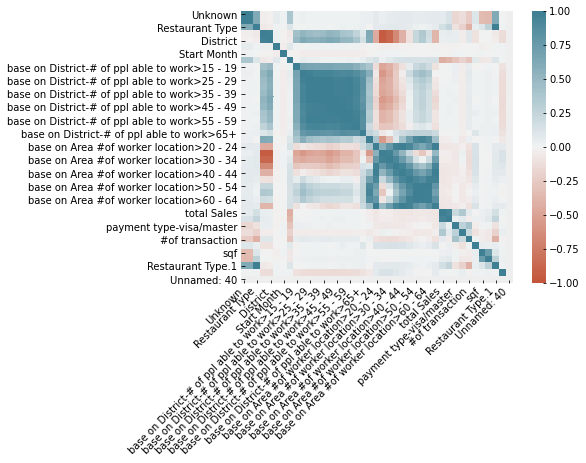

In [ ]:


corr = data_set.corr()
ax = sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
);

In [ ]:
Final=data_set

# Classification Algorithms for Resutrant Status

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif
from matplotlib import pyplot
X = Final[['Restaurant Type', 'Area', 'District',
       'base on District-# of ppl able to work>15 - 19',
       'base on District-# of ppl able to work>20 - 24',
       'base on District-# of ppl able to work>25 - 29',
       'base on District-# of ppl able to work>30 - 34',
       'base on District-# of ppl able to work>35 - 39',
       'base on District-# of ppl able to work>40 - 44',
       'base on District-# of ppl able to work>45 - 49',
       'base on District-# of ppl able to work>50 - 54',
       'base on District-# of ppl able to work>55 - 59',
       'base on District-# of ppl able to work>60 - 64',
       'base on District-# of ppl able to work>65+',
       'base on Area #of worker location>15 - 19',
       'base on Area #of worker location>20 - 24',
       'base on Area #of worker location>25 - 29',
       'base on Area #of worker location>30 - 34',
       'base on Area #of worker location>35 - 39',
       'base on Area #of worker location>40 - 44',
       'base on Area #of worker location>45 - 49',
       'base on Area #of worker location>50 - 54',
       'base on Area #of worker location>55 - 59',
       'base on Area #of worker location>60 - 64',
       'base on Area #of worker location>65+', 'total Sales',
       '#of transaction', 'sqf', 'mthly rent', 'Restaurant Type.1',
       'Location Type']]
y = Final[['Restaurant Status']]
# split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=1)


A support vector machine model to predict whether restaurant open or not
	Model			Train Acc	Test Acc
Support Vector Machine		   69 % 	   67 % 	  


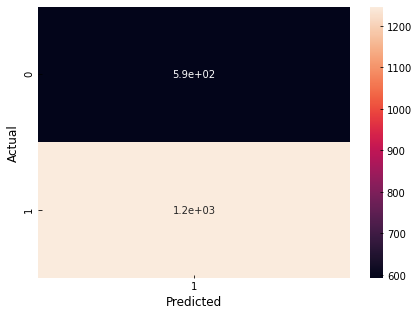

Confusion Matrix: SVM 
[[   0  592]
 [   0 1247]]
Classification Report:SVM 
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       592
           1       0.68      1.00      0.81      1247

    accuracy                           0.68      1839
   macro avg       0.34      0.50      0.40      1839
weighted avg       0.46      0.68      0.55      1839

('Support Vector Machine Classifier Accuracy:', 67.80859162588364)


In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn import metrics
print("A support vector machine model to predict whether restaurant open or not")
clf = SVC()
clf.fit(X_train, y_train.values.ravel())
y_true, y_pred = y_test, clf.predict(X_test)
print("\tModel\t\t\tTrain Acc\tTest Acc")
print("Support Vector Machine\t\t  ",int(clf.score(X_train,y_train)*100),"% \t  ", int(100*clf.score(X_test,y_test)),"% \t  ")
TrueResultslat=y_test
PredictedResultslat=clf.predict(X_test)
data = {'y_Actual':    y_test['Restaurant Status'].values,
    'y_Predicted': PredictedResultslat
    }
df = pd.DataFrame(data, columns=['y_Actual','y_Predicted'])
confusion_matrixf = pd.crosstab(df['y_Actual'], df['y_Predicted'], rownames=['Actual'], colnames=['Predicted'])

sns.heatmap(confusion_matrixf, annot=True)
plt.show()
print(("Confusion Matrix: SVM "))
print(confusion_matrix(y_test,PredictedResultslat))
print(("Classification Report:SVM "))
print(classification_report(y_test,PredictedResultslat))
LR_accuracy = metrics.accuracy_score(y_test, PredictedResultslat)
print(("Support Vector Machine Classifier Accuracy:" ,LR_accuracy*100))
Accuracy_SVM=LR_accuracy*100

A Logistic Regression model to predict whether restaurant open or not
	Model			Train Acc	Test Acc
Logistic Regression		   69 % 	   67 % 	  


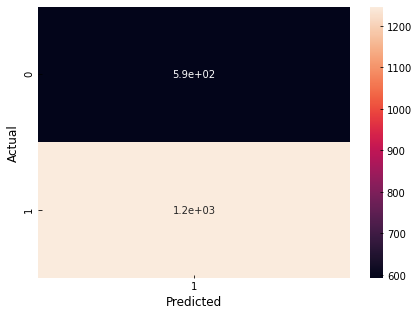

Confusion Matrix: Logistic Regression 
[[   0  592]
 [   0 1247]]
Classification Report:Logistic Regression 
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       592
           1       0.68      1.00      0.81      1247

    accuracy                           0.68      1839
   macro avg       0.34      0.50      0.40      1839
weighted avg       0.46      0.68      0.55      1839

('Logistic Regression Classifier Accuracy:', 67.80859162588364)


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
print("A Logistic Regression model to predict whether restaurant open or not")
clf = LogisticRegression()
clf.fit(X_train, y_train.values.ravel())
y_true, y_pred = y_test, clf.predict(X_test)
print("\tModel\t\t\tTrain Acc\tTest Acc")
print("Logistic Regression\t\t  ",int(clf.score(X_train,y_train)*100),"% \t  ", int(100*clf.score(X_test,y_test)),"% \t  ")
TrueResultslat=y_test
PredictedResultslat=clf.predict(X_test)
data = {'y_Actual':    y_test['Restaurant Status'].values,
    'y_Predicted': PredictedResultslat
    }
df = pd.DataFrame(data, columns=['y_Actual','y_Predicted'])
confusion_matrixf = pd.crosstab(df['y_Actual'], df['y_Predicted'], rownames=['Actual'], colnames=['Predicted'])

sns.heatmap(confusion_matrixf, annot=True)
plt.show()
print(("Confusion Matrix: Logistic Regression "))
print(confusion_matrix(y_test,PredictedResultslat))
print(("Classification Report:Logistic Regression "))
print(classification_report(y_test,PredictedResultslat))
LR_accuracy = metrics.accuracy_score(y_test, PredictedResultslat)
print(("Logistic Regression Classifier Accuracy:" ,LR_accuracy*100))
Accuracy_Logistic=LR_accuracy*100

A Decision Tree Classifier model to predict whether restaurant open or not
	Model			Train Acc	Test Acc
Decision Tree Classifier		   83 % 	   80 % 	  


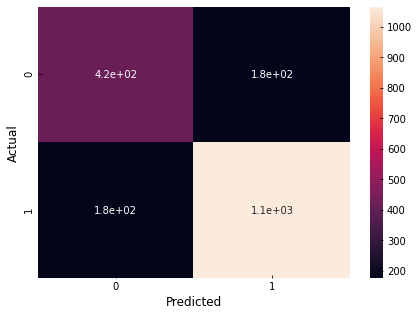

Confusion Matrix: Decision Tree Classifier 
[[ 417  175]
 [ 181 1066]]
Classification Report:Decision Tree Classifier 
              precision    recall  f1-score   support

           0       0.70      0.70      0.70       592
           1       0.86      0.85      0.86      1247

    accuracy                           0.81      1839
   macro avg       0.78      0.78      0.78      1839
weighted avg       0.81      0.81      0.81      1839

('Decision Tree Classifier Accuracy:', 80.64165307232192)


In [ ]:
print("A Decision Tree Classifier model to predict whether restaurant open or not")
clf = DecisionTreeClassifier(max_depth=6)
clf.fit(X_train, y_train.values.ravel())
y_true, y_pred = y_test, clf.predict(X_test)
print("\tModel\t\t\tTrain Acc\tTest Acc")
print("Decision Tree Classifier\t\t  ",int(clf.score(X_train,y_train)*100),"% \t  ", int(100*clf.score(X_test,y_test)),"% \t  ")
TrueResultslat=y_test
PredictedResultslat=clf.predict(X_test)
data = {'y_Actual':    y_test['Restaurant Status'],
    'y_Predicted': PredictedResultslat
    }
df = pd.DataFrame(data, columns=['y_Actual','y_Predicted'])
confusion_matrixf = pd.crosstab(df['y_Actual'], df['y_Predicted'], rownames=['Actual'], colnames=['Predicted'])

sns.heatmap(confusion_matrixf, annot=True)
plt.show()
print(("Confusion Matrix: Decision Tree Classifier "))
print(confusion_matrix(y_test,PredictedResultslat))
print(("Classification Report:Decision Tree Classifier "))
print(classification_report(y_test,PredictedResultslat))
LR_accuracy = metrics.accuracy_score(y_test, PredictedResultslat)
print(("Decision Tree Classifier Accuracy:" ,LR_accuracy*100))
Accuracy_Decision=LR_accuracy*100

A Random Forest Classifier model to predict  whether restaurant open or not
	Model			Train Acc	Test Acc
Random Forest Classifier 		   89 % 	   85 % 	 


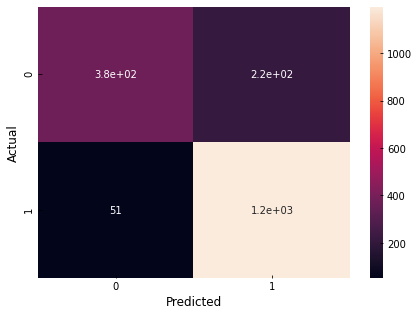

Confusion Matrix: Random Forest Classifier 
[[ 377  215]
 [  51 1196]]
Classification Report:Random Forest Classifier 
              precision    recall  f1-score   support

           0       0.88      0.64      0.74       592
           1       0.85      0.96      0.90      1247

    accuracy                           0.86      1839
   macro avg       0.86      0.80      0.82      1839
weighted avg       0.86      0.86      0.85      1839

('Random Forest Classifier Accuracy:', 85.53561718325177)


In [ ]:
print("A Random Forest Classifier model to predict  whether restaurant open or not")
clf = RandomForestClassifier(max_depth=7)
clf.fit(X_train, y_train.values.ravel())
y_true, y_pred = y_test, clf.predict(X_test)
print("\tModel\t\t\tTrain Acc\tTest Acc")
print("Random Forest Classifier \t\t  ",int(clf.score(X_train,y_train)*100),"% \t  ", int(100*clf.score(X_test,y_test)),"% \t ")
TrueResultslat=y_test
PredictedResultslat=clf.predict(X_test)
data = {'y_Actual':    y_test['Restaurant Status'],
    'y_Predicted': PredictedResultslat
    }
df = pd.DataFrame(data, columns=['y_Actual','y_Predicted'])
confusion_matrixf = pd.crosstab(df['y_Actual'], df['y_Predicted'], rownames=['Actual'], colnames=['Predicted'])

sns.heatmap(confusion_matrixf, annot=True)
plt.show()
print(("Confusion Matrix: Random Forest Classifier "))
print(confusion_matrix(y_test,PredictedResultslat))
print(("Classification Report:Random Forest Classifier "))
print(classification_report(y_test,PredictedResultslat))
LR_accuracy = metrics.accuracy_score(y_test, PredictedResultslat)
print(("Random Forest Classifier Accuracy:" ,LR_accuracy*100))
Accuracy_Random=LR_accuracy*100

A RidgeClassifier model to predict whether restaurant open or not
	Model			Train Acc	Test Acc
RidgeClassifier		   70 % 	   69 % 	  


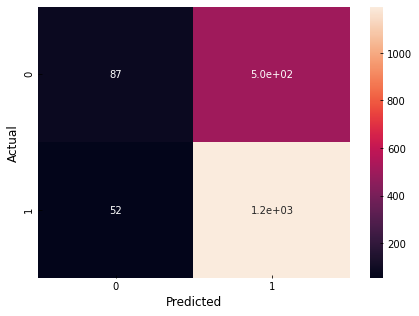

Confusion Matrix: RidgeClassifier 
[[  87  505]
 [  52 1195]]
Classification Report:RidgeClassifier
              precision    recall  f1-score   support

           0       0.63      0.15      0.24       592
           1       0.70      0.96      0.81      1247

    accuracy                           0.70      1839
   macro avg       0.66      0.55      0.52      1839
weighted avg       0.68      0.70      0.63      1839

('RidgeClassifier Accuracy:', 69.71179989124524)


In [ ]:
from sklearn.linear_model import RidgeClassifier
print("A RidgeClassifier model to predict whether restaurant open or not")
clf = RidgeClassifier()
clf.fit(X_train, y_train.values.ravel())
y_true, y_pred = y_test, clf.predict(X_test)
print("\tModel\t\t\tTrain Acc\tTest Acc")
print("RidgeClassifier\t\t  ",int(clf.score(X_train,y_train)*100),"% \t  ", int(100*clf.score(X_test,y_test)),"% \t  ")
TrueResultslat=y_test
PredictedResultslat=clf.predict(X_test)
data = {'y_Actual':    y_test['Restaurant Status'],
    'y_Predicted': PredictedResultslat
    }
df = pd.DataFrame(data, columns=['y_Actual','y_Predicted'])
confusion_matrixf = pd.crosstab(df['y_Actual'], df['y_Predicted'], rownames=['Actual'], colnames=['Predicted'])

sns.heatmap(confusion_matrixf, annot=True)
plt.show()
print(("Confusion Matrix: RidgeClassifier "))
print(confusion_matrix(y_test,PredictedResultslat))
print(("Classification Report:RidgeClassifier"))
print(classification_report(y_test,PredictedResultslat))
LR_accuracy = metrics.accuracy_score(y_test, PredictedResultslat)
print(("RidgeClassifier Accuracy:" ,LR_accuracy*100))
Accuracy_RidgeClassifier=LR_accuracy*100

A SGDClassifier model to predict whether restaurant open or not
	Model			Train Acc	Test Acc
SGDClassifier		   70 % 	   69 % 	  


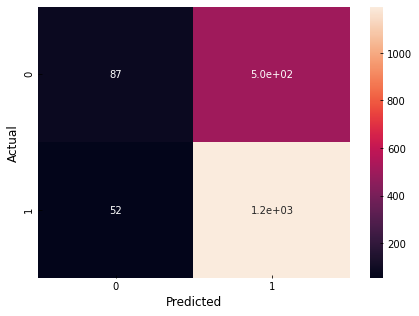

Confusion Matrix: SGDClassifier 
[[  87  505]
 [  52 1195]]
Classification Report:SGDClassifier
              precision    recall  f1-score   support

           0       0.63      0.15      0.24       592
           1       0.70      0.96      0.81      1247

    accuracy                           0.70      1839
   macro avg       0.66      0.55      0.52      1839
weighted avg       0.68      0.70      0.63      1839

('SGDClassifier Accuracy:', 69.71179989124524)


In [ ]:
from sklearn.linear_model import SGDClassifier
print("A SGDClassifier model to predict whether restaurant open or not")
clf = RidgeClassifier()
clf.fit(X_train, y_train.values.ravel())
y_true, y_pred = y_test, clf.predict(X_test)
print("\tModel\t\t\tTrain Acc\tTest Acc")
print("SGDClassifier\t\t  ",int(clf.score(X_train,y_train)*100),"% \t  ", int(100*clf.score(X_test,y_test)),"% \t  ")
TrueResultslat=y_test
PredictedResultslat=clf.predict(X_test)
data = {'y_Actual':    y_test['Restaurant Status'],
    'y_Predicted': PredictedResultslat
    }
df = pd.DataFrame(data, columns=['y_Actual','y_Predicted'])
confusion_matrixf = pd.crosstab(df['y_Actual'], df['y_Predicted'], rownames=['Actual'], colnames=['Predicted'])

sns.heatmap(confusion_matrixf, annot=True)
plt.show()
print(("Confusion Matrix: SGDClassifier "))
print(confusion_matrix(y_test,PredictedResultslat))
print(("Classification Report:SGDClassifier"))
print(classification_report(y_test,PredictedResultslat))
LR_accuracy = metrics.accuracy_score(y_test, PredictedResultslat)
print(("SGDClassifier Accuracy:" ,LR_accuracy*100))
Accuracy_SGDClassifier=LR_accuracy*100


A KNeighborsClassifier model to predict whether a Restaurant open or not
	Model			Train Acc	Test Acc
KNeighborsClassifier		   70 % 	   69 % 	  


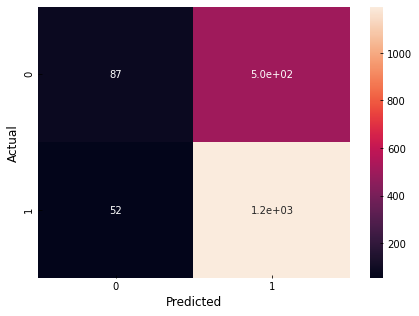

Confusion Matrix: KNeighborsClassifier 
[[  87  505]
 [  52 1195]]
Classification Report:KNeighborsClassifier
              precision    recall  f1-score   support

           0       0.63      0.15      0.24       592
           1       0.70      0.96      0.81      1247

    accuracy                           0.70      1839
   macro avg       0.66      0.55      0.52      1839
weighted avg       0.68      0.70      0.63      1839

('KNeighborsClassifier Accuracy:', 69.71179989124524)


In [ ]:
from sklearn.neighbors import KNeighborsClassifier
print("A KNeighborsClassifier model to predict whether a Restaurant open or not")
clf = RidgeClassifier()
clf.fit(X_train, y_train.values.ravel())
y_true, y_pred = y_test, clf.predict(X_test)
print("\tModel\t\t\tTrain Acc\tTest Acc")
print("KNeighborsClassifier\t\t  ",int(clf.score(X_train,y_train)*100),"% \t  ", int(100*clf.score(X_test,y_test)),"% \t  ")
TrueResultslat=y_test
PredictedResultslat=clf.predict(X_test)
data = {'y_Actual':    y_test['Restaurant Status'],
    'y_Predicted': PredictedResultslat
    }
df = pd.DataFrame(data, columns=['y_Actual','y_Predicted'])
confusion_matrixf = pd.crosstab(df['y_Actual'], df['y_Predicted'], rownames=['Actual'], colnames=['Predicted'])

sns.heatmap(confusion_matrixf, annot=True)
plt.show()
print(("Confusion Matrix: KNeighborsClassifier "))
print(confusion_matrix(y_test,PredictedResultslat))
print(("Classification Report:KNeighborsClassifier"))
print(classification_report(y_test,PredictedResultslat))
LR_accuracy = metrics.accuracy_score(y_test, PredictedResultslat)
print(("KNeighborsClassifier Accuracy:" ,LR_accuracy*100))
Accuracy_KNeighborsClassifier=LR_accuracy*100


	Model			Train Acc	Test Acc
Multi-layer Perceptron Neural Network classifier.		   69 % 	   67 % 	  


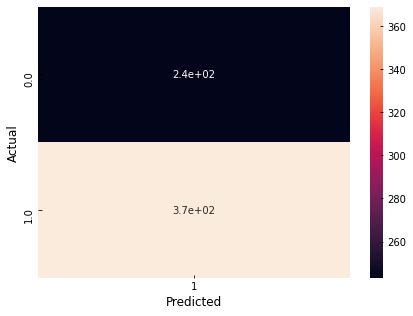

Multi-layer Perceptron Neural Network Classifier 
[[   0  592]
 [   0 1247]]
Classification Report:Multi-layer Perceptron Neural Network Classifier 
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       592
           1       0.68      1.00      0.81      1247

    accuracy                           0.68      1839
   macro avg       0.34      0.50      0.40      1839
weighted avg       0.46      0.68      0.55      1839

('Multi-layer Perceptron Neural Network Accuracy:', 67.80859162588364)


In [ ]:
clf = MLPClassifier(solver='lbfgs', alpha=1e-5,hidden_layer_sizes=(5, 2), random_state=1)
clf.fit(X_train, y_train.values.ravel())
y_true, y_pred = y_test, clf.predict(X_test)
print("\tModel\t\t\tTrain Acc\tTest Acc")
print("Multi-layer Perceptron Neural Network classifier.\t\t  ",int(clf.score(X_train,y_train)*100),"% \t  ", int(100*clf.score(X_test,y_test)),"% \t  ")
TrueResultslat=y_test
PredictedResultslat=clf.predict(X_test)
df = pd.DataFrame()
df['y_Predicted'] = list(PredictedResultslat)
df['y_Actual'] = y_test['Restaurant Status']
confusion_matrixf = pd.crosstab(df['y_Actual'], df['y_Predicted'], rownames=['Actual'], colnames=['Predicted'])
sns.heatmap(confusion_matrixf, annot=True)
plt.show()
print(("Multi-layer Perceptron Neural Network Classifier "))
print(confusion_matrix(y_test,PredictedResultslat))
print(("Classification Report:Multi-layer Perceptron Neural Network Classifier "))
print(classification_report(y_test,PredictedResultslat))
LR_accuracy = metrics.accuracy_score(y_test, PredictedResultslat)
print(("Multi-layer Perceptron Neural Network Accuracy:" ,LR_accuracy*100))
Accuracy_MLP=LR_accuracy*100

In [ ]:
from numpy import loadtxt
from keras.models import Sequential
from keras.layers import Dense
# define the keras model
model = Sequential()
model.add(Dense(12, input_dim=31, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
# compile the keras model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
# fit the keras model on the dataset
model.fit(X_train, y_train.values.ravel(), epochs=150, batch_size=10)
# evaluate the keras model
TrueResultslat = y_test
PredictedResultslat = model.predict(X_test)
accuracy = model.evaluate(X_test, y_test)
Deep_Sequential_Neural = accuracy[1]*100
print()
print('Accuracy of Deep Sequential Neural Network: %.2f' % (Deep_Sequential_Neural))

Epoch 1/150
374/374 [==============================] - 1s 1ms/step - loss: 64104.6314 - accuracy: 0.4391
Epoch 2/150
374/374 [==============================] - 0s 1ms/step - loss: 28.3427 - accuracy: 0.5874
Epoch 3/150
374/374 [==============================] - 0s 1ms/step - loss: 28.6951 - accuracy: 0.5906
Epoch 4/150
374/374 [==============================] - 0s 1ms/step - loss: 18.8708 - accuracy: 0.5918
Epoch 5/150
374/374 [==============================] - 0s 1ms/step - loss: 9.4866 - accuracy: 0.5976
Epoch 6/150
374/374 [==============================] - 0s 1ms/step - loss: 4.5644 - accuracy: 0.5944
Epoch 7/150
374/374 [==============================] - 0s 1ms/step - loss: 2.3083 - accuracy: 0.5956
Epoch 8/150
374/374 [==============================] - 0s 1ms/step - loss: 1.1135 - accuracy: 0.6008
Epoch 9/150
374/374 [==============================] - 0s 1ms/step - loss: 0.8250 - accuracy: 0.6706
Epoch 10/150
374/374 [==============================] - 0s 1ms/step - loss: 0.7891 -

In [ ]:
AA=pd.DataFrame()
AA['Algorithm']=[ 'SVM','Decision Tree Classifier','Multi-layer Perceptron Neural Network classifier','Deep Sequential Neural Network','Logistic Regression','Radom Forest Classification','Ridge Classification','SGD Classifier','K Neighbors Classifier']
AA['Accuracy (%)']=[Accuracy_SVM, Accuracy_Decision,Accuracy_MLP,Deep_Sequential_Neural,Accuracy_Logistic,Accuracy_Random,Accuracy_RidgeClassifier,Accuracy_SGDClassifier,Accuracy_KNeighborsClassifier]
AA=AA.sort_values(['Accuracy (%)'])
import plotly.express as px
fig = px.bar(AA, x='Algorithm', y='Accuracy (%)',title="Accuracy of each Classifier for Resturant Status Recommendation",color='Accuracy (%)')
fig.show()

KFold(n_splits=3, random_state=None, shuffle=False)
TRAIN: [1857 1858 1859 ... 5567 5568 5569] TEST: [   0    1    2 ... 1854 1855 1856]
A Random Forest Classifier model to predict  whether restaurant open or not
	Model			Train Acc	Test Acc
Random Forest Classifier 		   89 % 	   58 % 	  


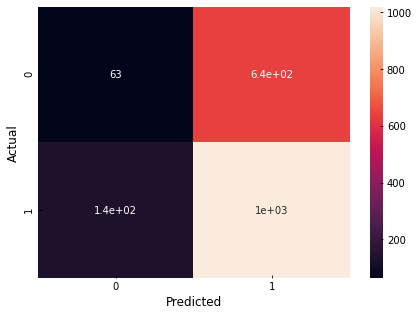

Confusion Matrix: Random Forest Classifier 
[[  63  637]
 [ 137 1020]]
Classification Report:Random Forest Classifier 
              precision    recall  f1-score   support

           0       0.32      0.09      0.14       700
           1       0.62      0.88      0.72      1157

    accuracy                           0.58      1857
   macro avg       0.47      0.49      0.43      1857
weighted avg       0.50      0.58      0.50      1857

('Random Forest Classifier Accuracy:', 58.319870759289174)
TRAIN: [   0    1    2 ... 5567 5568 5569] TEST: [1857 1858 1859 ... 3711 3712 3713]
A Random Forest Classifier model to predict  whether restaurant open or not
	Model			Train Acc	Test Acc
Random Forest Classifier 		   89 % 	   51 % 	  


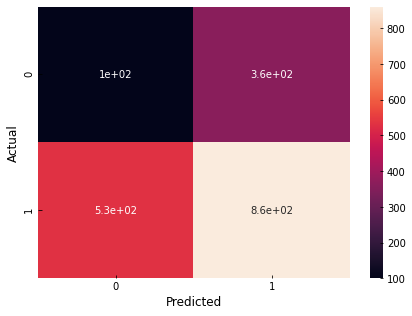

Confusion Matrix: Random Forest Classifier 
[[100 364]
 [532 861]]
Classification Report:Random Forest Classifier 
              precision    recall  f1-score   support

           0       0.16      0.22      0.18       464
           1       0.70      0.62      0.66      1393

    accuracy                           0.52      1857
   macro avg       0.43      0.42      0.42      1857
weighted avg       0.57      0.52      0.54      1857

('Random Forest Classifier Accuracy:', 51.75013462574044)
TRAIN: [   0    1    2 ... 3711 3712 3713] TEST: [3714 3715 3716 ... 5567 5568 5569]
A Random Forest Classifier model to predict  whether restaurant open or not
	Model			Train Acc	Test Acc
Random Forest Classifier 		   87 % 	   51 % 	  


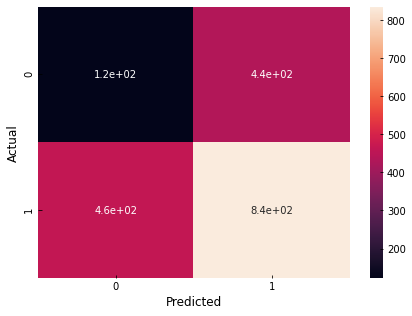

Confusion Matrix: Random Forest Classifier 
[[122 436]
 [463 835]]
Classification Report:Random Forest Classifier 
              precision    recall  f1-score   support

           0       0.21      0.22      0.21       558
           1       0.66      0.64      0.65      1298

    accuracy                           0.52      1856
   macro avg       0.43      0.43      0.43      1856
weighted avg       0.52      0.52      0.52      1856

('Random Forest Classifier Accuracy:', 51.5625)


In [ ]:
from sklearn.model_selection import KFold
kf = KFold(n_splits=3)
kf.get_n_splits(X)
print(kf)
KFold(n_splits=5, random_state=None, shuffle=False)
for train_index, test_index in kf.split(X):
    print("TRAIN:", train_index, "TEST:", test_index)
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    #X_train,X_test,y_train,y_test=train_test_split(X, y, test_size=0.50,shuffle=False)
    print("A Random Forest Classifier model to predict  whether restaurant open or not")
    clf = RandomForestClassifier(max_depth=7)
    clf.fit(X_train, y_train.values.ravel())
    y_true, y_pred = y_test, clf.predict(X_test)
    print("\tModel\t\t\tTrain Acc\tTest Acc")
    print("Random Forest Classifier \t\t  ",int(clf.score(X_train,y_train)*100),"% \t  ", int(100*clf.score(X_test,y_test)),"% \t  ")
    TrueResultslat=y_test
    PredictedResultslat=clf.predict(X_test)
    data = {'y_Actual':    y_test['Restaurant Status'],
        'y_Predicted': PredictedResultslat
        }
    df = pd.DataFrame(data, columns=['y_Actual','y_Predicted'])
    confusion_matrixf = pd.crosstab(df['y_Actual'], df['y_Predicted'], rownames=['Actual'], colnames=['Predicted'])

    sns.heatmap(confusion_matrixf, annot=True)
    plt.show()
    print(("Confusion Matrix: Random Forest Classifier "))
    print(confusion_matrix(y_test,PredictedResultslat))
    print(("Classification Report:Random Forest Classifier "))
    print(classification_report(y_test,PredictedResultslat))
    LR_accuracy = metrics.accuracy_score(y_test, PredictedResultslat)
    print(("Random Forest Classifier Accuracy:" ,LR_accuracy*100))

# Working for Sales

In [ ]:
X=data_set[['Restaurant Type', 'Area', 'District',
       'base on District-# of ppl able to work>15 - 19',
       'base on District-# of ppl able to work>20 - 24',
       'base on District-# of ppl able to work>25 - 29',
       'base on District-# of ppl able to work>30 - 34',
       'base on District-# of ppl able to work>35 - 39',
       'base on District-# of ppl able to work>40 - 44',
       'base on District-# of ppl able to work>45 - 49',
       'base on District-# of ppl able to work>50 - 54',
       'base on District-# of ppl able to work>55 - 59',
       'base on District-# of ppl able to work>60 - 64',
       'base on District-# of ppl able to work>65+',
       'base on Area #of worker location>15 - 19',
       'base on Area #of worker location>20 - 24',
       'base on Area #of worker location>25 - 29',
       'base on Area #of worker location>30 - 34',
       'base on Area #of worker location>35 - 39',
       'base on Area #of worker location>40 - 44',
       'base on Area #of worker location>45 - 49',
       'base on Area #of worker location>50 - 54',
       'base on Area #of worker location>55 - 59',
       'base on Area #of worker location>60 - 64',
       'base on Area #of worker location>65+', 'Restaurant Status',
       '#of transaction', 'sqf', 'mthly rent', 'Restaurant Type.1',
       'Location Type']]

In [ ]:
y=data_set['total Sales']

In [ ]:
X_train,X_test,y_train,y_test=train_test_split(X, y, test_size=0.20,shuffle=True)

regression score function:  0.5227345371284284
Mean Squared Error:  29976006682119.22


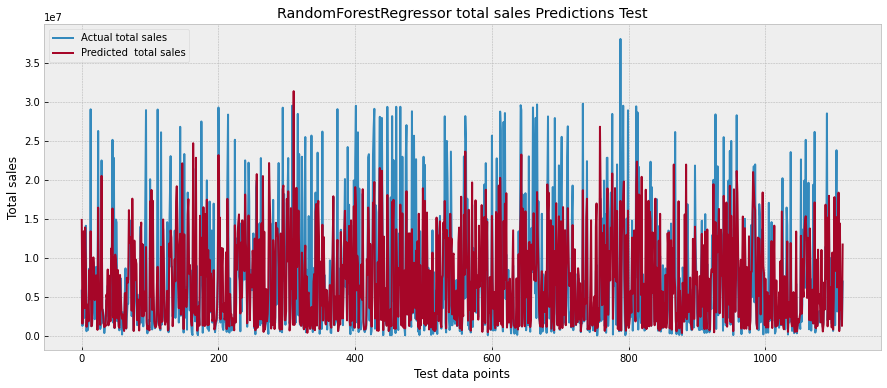

In [ ]:
reg=RandomForestRegressor(n_estimators=200,random_state=0)
reg.fit(X_train,y_train)
pre=reg.predict(X_test)
rms=r2_score(y_test,pre)
print("regression score function: ",rms)
rms=mean_squared_error(y_test,pre)
print("Mean Squared Error: ",rms)

plt.rcParams["figure.figsize"] = (15,6)
plt.plot(y_test.values)
plt.plot(pre)
plt.title("RandomForestRegressor total sales Predictions Test")
plt.ylabel("Total sales")
plt.xlabel("Test data points")
plt.legend(['Actual total sales', 'Predicted  total sales'], loc='upper left')
plt.savefig("RandomForestRegressor Total Sales Predictions Test.png")
plt.show()
RMSE_RandomForestRegressor=rms
predicted_RandomForestRegressor=pre

regression score function:  0.022457276537031
Mean Squared Error:  61397334377132.88


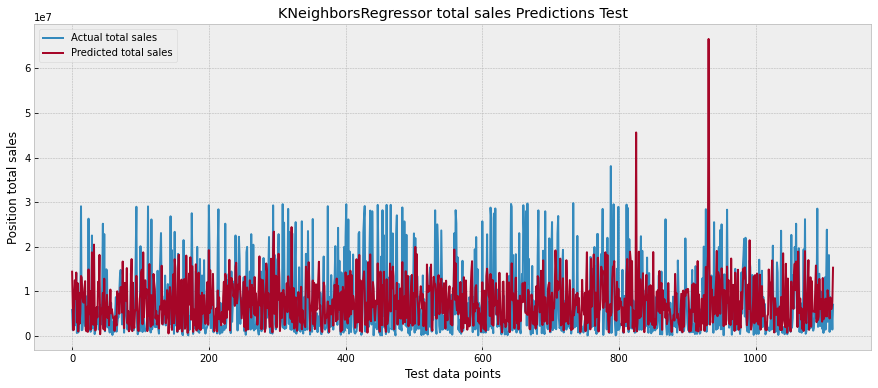

In [ ]:
reg=KNeighborsRegressor()
reg.fit(X_train,y_train)
pre=reg.predict(X_test)

rms=r2_score(y_test,pre)
print("regression score function: ",rms)
rms=mean_squared_error(y_test,pre)
print("Mean Squared Error: ",rms)
plt.rcParams["figure.figsize"] = (15,6)
plt.plot(y_test.values)
plt.plot(pre)
plt.title("KNeighborsRegressor total sales Predictions Test")
plt.ylabel("Position total sales")
plt.xlabel("Test data points")
plt.legend(['Actual total sales', 'Predicted total sales'], loc='upper left')
plt.savefig("KNeighborsRegressor Total Sales Predictions test.png")
plt.show()
RMSE_KNeighborsRegressor=rms
predicted_KNeighborsRegressor=pre

regression score function:  0.10860389976798246
Mean Squared Error:  55986652158319.38


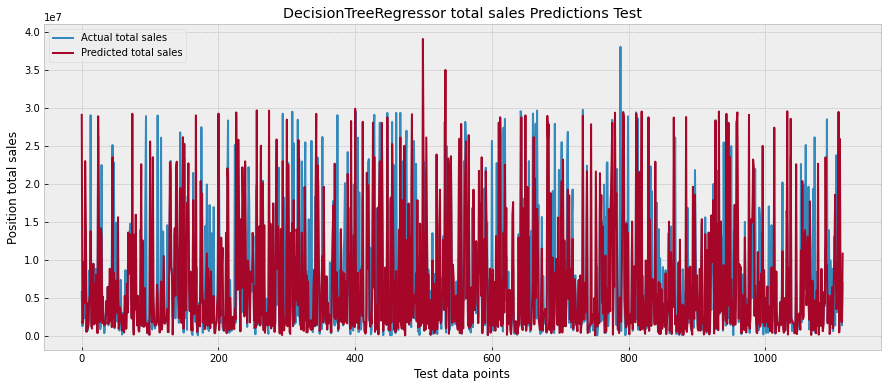

In [ ]:
reg=DecisionTreeRegressor()
reg.fit(X_train,y_train)
pre=reg.predict(X_test)
rms=r2_score(y_test,pre)
print("regression score function: ",rms)
rms=mean_squared_error(y_test,pre)
print("Mean Squared Error: ",rms)

plt.rcParams["figure.figsize"] = (15,6)
plt.plot(y_test.values)
plt.plot(pre)
plt.title("DecisionTreeRegressor total sales Predictions Test")
plt.ylabel("Position total sales")
plt.xlabel("Test data points")
plt.legend(['Actual total sales', 'Predicted total sales'], loc='upper left')
plt.savefig("DecisionTreeRegressor Total Sales Predictions test.png")
plt.show()
RMSE_DecisionTreeRegressor=rms
predicted_DecisionTreeRegressor=pre

regression score function:  0.5057186791371377
Mean Squared Error:  31044735749125.223


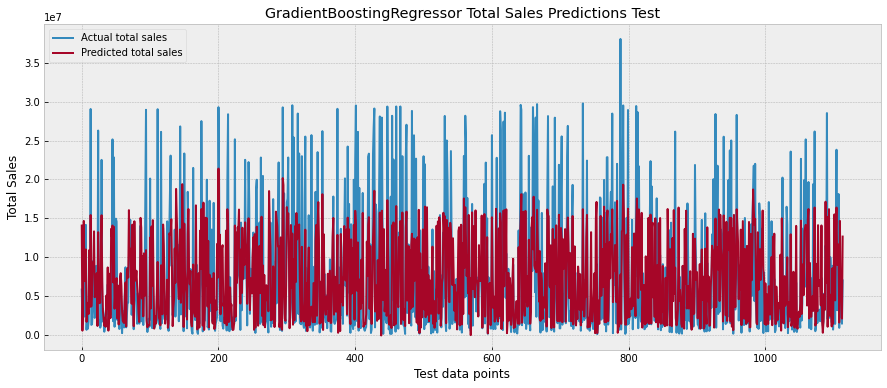

In [ ]:
reg=GradientBoostingRegressor()
reg.fit(X_train,y_train)
pre=reg.predict(X_test)
rms=r2_score(y_test,pre)
print("regression score function: ",rms)
rms=mean_squared_error(y_test,pre)
print("Mean Squared Error: ",rms)

plt.rcParams["figure.figsize"] = (15,6)
plt.plot(y_test.values)
plt.plot(pre)
plt.title("GradientBoostingRegressor Total Sales Predictions Test")
plt.ylabel("Total Sales")
plt.xlabel("Test data points")
plt.legend(['Actual total sales', 'Predicted total sales'], loc='upper left')
plt.savefig("GradientBoostingRegressor Total Sales Predictions test.png")
plt.show()
RMSE_GradientBoostingRegressor=rms
predicted_GradientBoostingRegressor=pre

regression score function:  0.026299409725209166
Mean Squared Error:  61156018340079.914


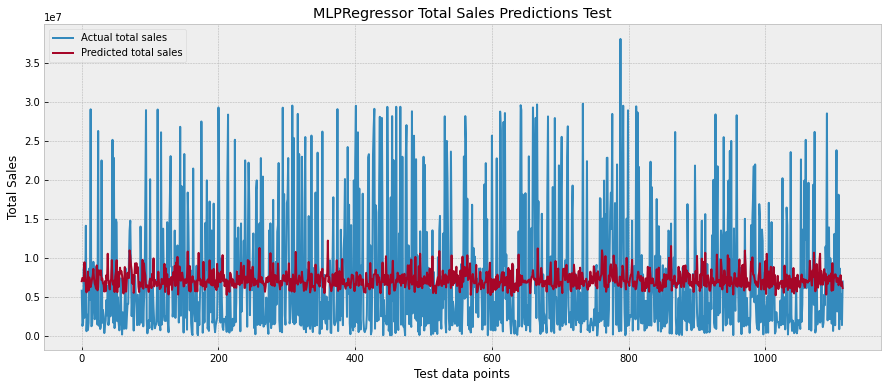

In [ ]:
reg=MLPRegressor()
reg.fit(X_train,y_train)
pre=reg.predict(X_test)
rms=r2_score(y_test,pre)
print("regression score function: ",rms)
rms=mean_squared_error(y_test,pre)
print("Mean Squared Error: ",rms)

plt.rcParams["figure.figsize"] = (15,6)
plt.plot(y_test.values)
plt.plot(pre)
plt.title("MLPRegressor Total Sales Predictions Test")
plt.ylabel("Total Sales")
plt.xlabel("Test data points")
plt.legend(['Actual total sales', 'Predicted total sales'], loc='upper left')
plt.show()
RMSE_MLPRegressor=rms
predicted_MLPRegressor=pre

In [ ]:
from keras.models import Sequential
from keras.layers import Dense
from sklearn.datasets import make_regression
from sklearn.preprocessing import MinMaxScaler
#Y = y
import time
model = Sequential()
model.add(Dense(20, input_dim=31, kernel_initializer='normal', activation='relu'))
model.add(Dense(1, kernel_initializer='normal'))
	# Compile model
model.compile(loss='mean_squared_error', optimizer='adam')
start=time.time()
model.fit(X_train, y_train, epochs=1000, verbose=0)
ynew = model.predict(X_test)
Time__NNBF=time.time()-start
print(Time__NNBF)


105.5109384059906


In [ ]:
predicted_NNFB=ynew 

In [ ]:
rms=mean_squared_error(ynew,y_test)
print("Root Mean Square Error: ",rms)
ynew=pd.DataFrame(ynew)
ynew.to_csv('FeedBacktestX.csv')
#!cp FeedBacktestX.csv "drive/My Drive/"

Root Mean Square Error:  62237960164558.56


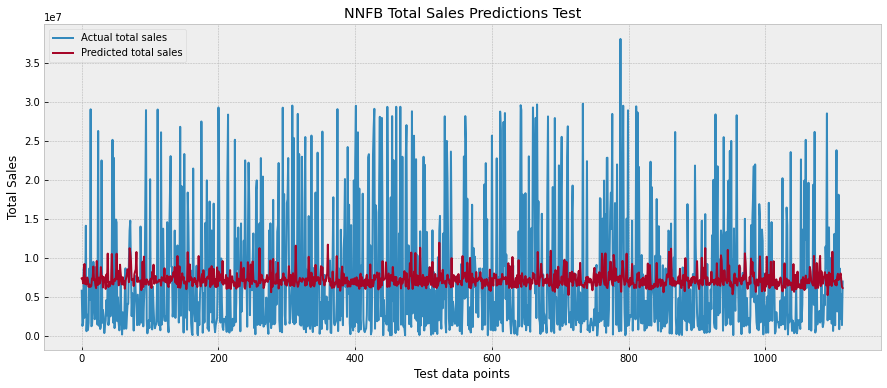

In [ ]:
plt.rcParams["figure.figsize"] = (15,6)
plt.plot(y_test.values)
plt.plot(predicted_NNFB)
plt.title("NNFB Total Sales Predictions Test")
plt.ylabel("Total Sales")
plt.xlabel("Test data points")
plt.legend(['Actual total sales', 'Predicted total sales'], loc='upper left')
plt.show()
RMSE_NNBF=rms


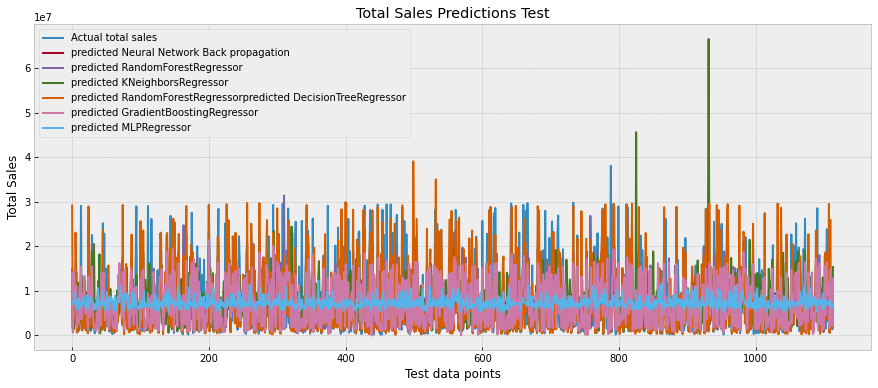

In [ ]:
plt.plot(y_test.values)
plt.plot(predicted_NNFB)
plt.plot(predicted_RandomForestRegressor)
plt.plot(predicted_KNeighborsRegressor)
plt.plot(predicted_DecisionTreeRegressor)
plt.plot(predicted_GradientBoostingRegressor)
plt.plot(predicted_MLPRegressor)



plt.rcParams["figure.figsize"] = (15,6)
plt.title("Total Sales Predictions Test")
plt.ylabel("Total Sales")
plt.xlabel("Test data points")
plt.legend(['Actual total sales','predicted Neural Network Back propagation'
           ,'predicted RandomForestRegressor','predicted KNeighborsRegressor','predicted RandomForestRegressor'
           'predicted DecisionTreeRegressor','predicted GradientBoostingRegressor','predicted MLPRegressor'], loc='upper left')
plt.savefig("Testig X complete.png")
plt.show()


In [ ]:
pd.set_option('display.float_format', lambda x: '%.3f' % x)
new=pd.DataFrame()
new['Algorithm']=[ 'RandomForestRegressor','KNeighborsRegressor',
                  'DecisionTreeRegressor','GradientBoostingRegressor','MLPRegressor','NeuralBack']
new[ "Mean Squared Error" ]=[RMSE_RandomForestRegressor , RMSE_KNeighborsRegressor
                             ,RMSE_DecisionTreeRegressor  ,RMSE_GradientBoostingRegressor, RMSE_MLPRegressor  , RMSE_NNBF]
new


,Algorithm,Mean Squared Error
0,RandomForestRegressor,29976006682119.219
1,KNeighborsRegressor,61397334377132.883
2,DecisionTreeRegressor,55986652158319.383
3,GradientBoostingRegressor,31044735749125.223
4,MLPRegressor,61156018340079.914
5,NeuralBack,62237960164558.562


In [ ]:
fig = px.bar(new, x='Algorithm', y="Mean Squared Error",
             title="Mean Squared Error for Each Algorithm to predict sales revenue",color='Mean Squared Error')
fig.data[-1].text = new['Mean Squared Error']
fig.update_traces(textposition='outside')
fig.show()

KFold(n_splits=5, random_state=None, shuffle=False)
TRAIN: [1114 1115 1116 ... 5567 5568 5569] TEST: [   0    1    2 ... 1111 1112 1113]
regression score function:  -2.927299346077789
Mean Squared Error:  93620899409687.17


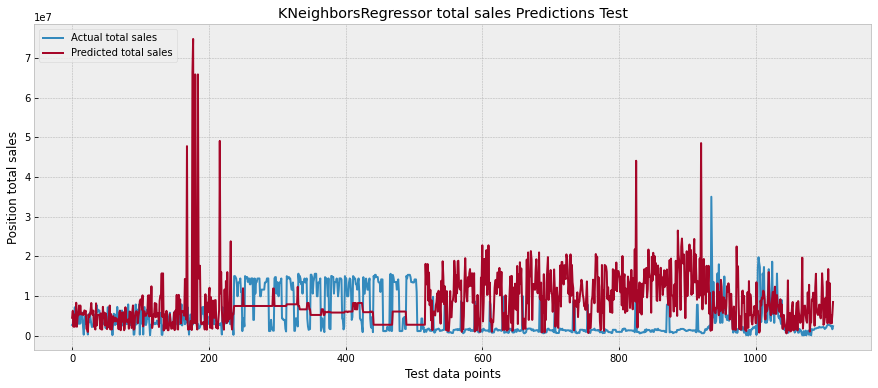

TRAIN: [   0    1    2 ... 5567 5568 5569] TEST: [1114 1115 1116 ... 2225 2226 2227]
regression score function:  -1.029450889473516
Mean Squared Error:  64565019328888.805


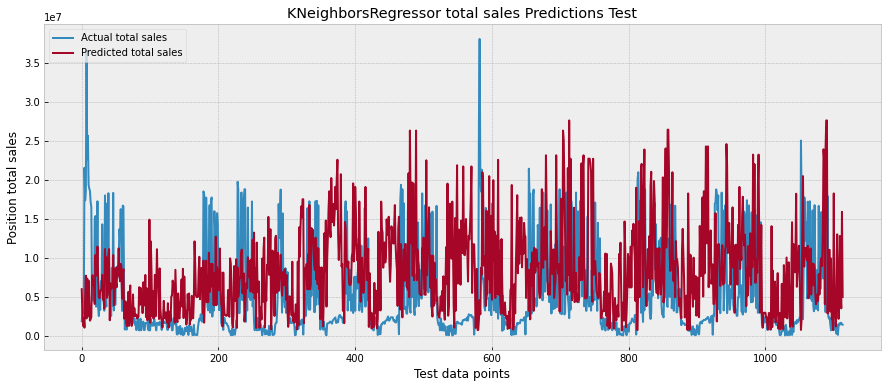

TRAIN: [   0    1    2 ... 5567 5568 5569] TEST: [2228 2229 2230 ... 3339 3340 3341]
regression score function:  -0.19611625074030403
Mean Squared Error:  208926327857356.12


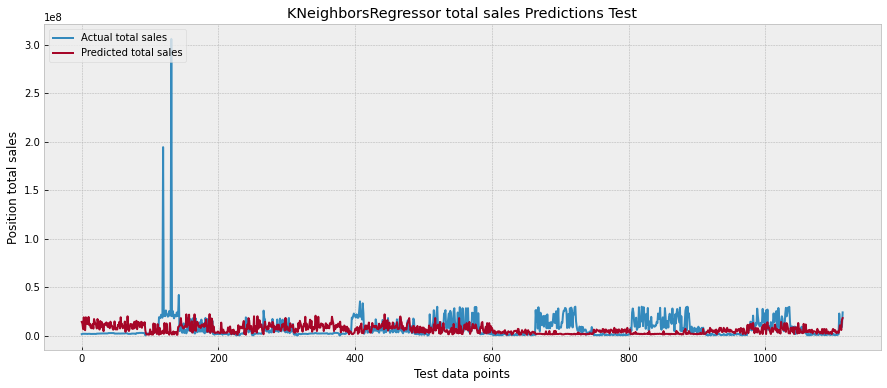

TRAIN: [   0    1    2 ... 5567 5568 5569] TEST: [3342 3343 3344 ... 4453 4454 4455]
regression score function:  -0.7933056836079948
Mean Squared Error:  158394980329721.62


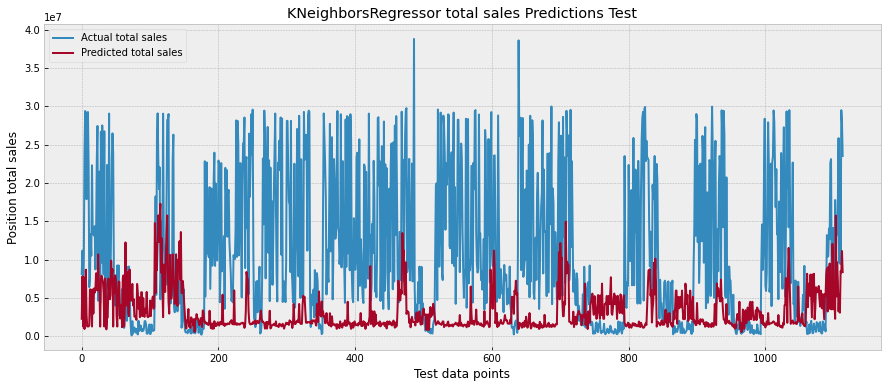

TRAIN: [   0    1    2 ... 4453 4454 4455] TEST: [4456 4457 4458 ... 5567 5568 5569]
regression score function:  -0.5201801095805916
Mean Squared Error:  91368312081779.28


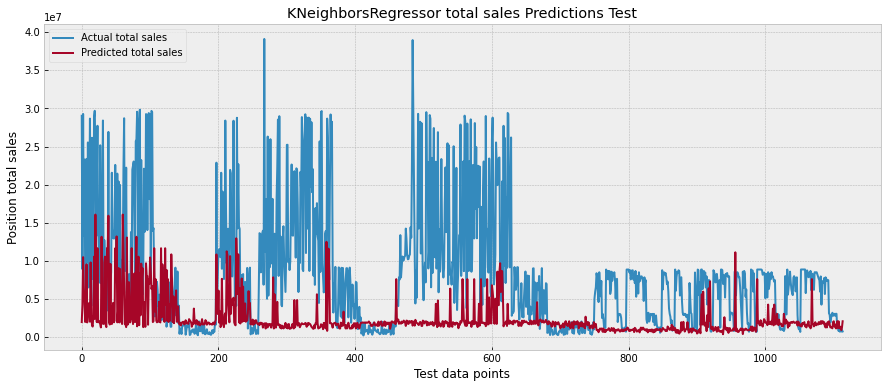

In [ ]:
from sklearn.model_selection import KFold
kf = KFold(n_splits=5)
kf.get_n_splits(X)
print(kf)
KFold(n_splits=5, random_state=None, shuffle=False)
KFold(n_splits=2, random_state=None, shuffle=False)
for train_index, test_index in kf.split(X):
    print("TRAIN:", train_index, "TEST:", test_index)
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    reg=KNeighborsRegressor()
    reg.fit(X_train,y_train)
    pre=reg.predict(X_test)

    rms=r2_score(y_test,pre)
    print("regression score function: ",rms)
    rms=mean_squared_error(y_test,pre)
    print("Mean Squared Error: ",rms)
    plt.rcParams["figure.figsize"] = (15,6)
    plt.plot(y_test.values)
    plt.plot(pre)
    plt.title("KNeighborsRegressor total sales Predictions Test")
    plt.ylabel("Position total sales")
    plt.xlabel("Test data points")
    plt.legend(['Actual total sales', 'Predicted total sales'], loc='upper left')
    plt.savefig("KNeighborsRegressor Total Sales Predictions test.png")
    plt.show()